In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../Artifacts/sentiment_analysis.csv')

In [3]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
import re
import string

In [9]:
#convert uppercase to lowercase
data["tweet"] = data["tweet"].apply(lambda x :" ".join(x.lower() for x in x.split()))

In [13]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [11]:
# Remove Links 
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
# Remove Punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuation(text):
    for row in string.punctuation:
        text = text.replace(row,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuation)


In [21]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [20]:
#remove Numbers
data["tweet"] = data["tweet"].str.replace('\d+','',regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kavindud\AppData\Local\Temp\ipykernel_42716\2275722766.py:2: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data["tweet"].str.replace('\d+','',regex=True)


In [22]:
import nltk

In [23]:
nltk.download('stopwords',download_dir= '../Static/Model')

[nltk_data] Downloading package stopwords to ../Static/Model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../Static/Model/corpora/stopwords/english', 'r') as file:
    stop_words = file.read().splitlines()
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(x for x in x.split() if x not in stop_words))

In [29]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [31]:
# Stemming 
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data["tweet"] = data["tweet"].apply(lambda x : " ".join(ps.stem(x) for x in x.split()))

In [32]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [33]:
# Building A Vocabulary
from collections import Counter
vocab = Counter()

vocab


Counter()

In [35]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())
len(vocab)

15949

In [39]:
for i,word in enumerate(vocab):
    if i == 10:
        break
    print(word)


fingerprint
pregnanc
test
android
app
beauti
cute
health
iger
iphoneonli


In [37]:
data.shape

(7920, 3)

In [40]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [41]:
tokens = [key for key in vocab if vocab[key] > 10]
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [42]:
len(tokens)

1145

In [43]:
def save_vocabulary(lines , filename):
    data = '\n'.join(lines)
    file = open(filename , 'w' , encoding= "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens , '../Static/model/vocabulary.txt')

In [ ]:
## Divide Dataset 
x = data['tweet']
y = data['label']


In [51]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train  , y_test = train_test_split(x , y , test_size = 0.2)

In [52]:
x_train.shape

(6336,)

In [54]:
x_test.shape

(1584,)

In [55]:
y_test

2337    0
2855    1
872     0
5484    0
3055    1
       ..
857     0
4075    1
242     0
1871    1
7862    1
Name: label, Length: 1584, dtype: int64

In [56]:
y_train

2083    1
2229    1
6947    0
5139    0
2205    1
       ..
7289    0
2885    1
642     0
6280    0
1582    0
Name: label, Length: 6336, dtype: int64

In [57]:
x_train

2083    laptop wont fucken work fuckpc even bigger fuc...
2229    serious autocorrect fix non english word autoc...
6947    sunset one minut ago europ zeeland samsung sun...
5139    smoke soundcloud kingcrowley king kushk ink ip...
2205    applemap eat fist retard sandwich everi meal a...
                              ...                        
7289    iconvers dubai iphon instagood smile follow cu...
2885    like would get iphon peopl get hype plu heard ...
642     didnt get iphon ahahahaha jk someon got samsun...
6280    follow capetownsup instagram sup surf fun cape...
1582    goofi gym appl iphon fit russia moscow nice do...
Name: tweet, Length: 6336, dtype: object

In [58]:
# Vectorization
def vectorizer(ds , vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list , dtype= np.float32)

    return vectorized_list_new

In [59]:
vectorized_x_train = vectorizer(x_train , tokens)

In [61]:

for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [62]:
vectorized_x_test = vectorizer(x_test , tokens)

In [63]:
y_train

2083    1
2229    1
6947    0
5139    0
2205    1
       ..
7289    0
2885    1
642     0
6280    0
1582    0
Name: label, Length: 6336, dtype: int64

In [65]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

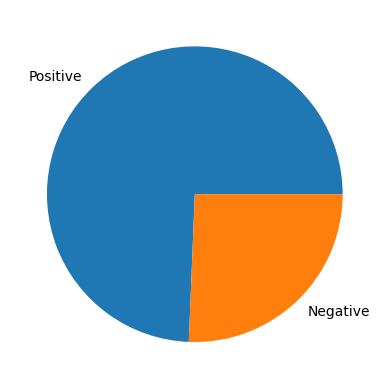

In [66]:
# Plotting 
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [67]:
## Handle inmbalanded dataet
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9422, 1145) (9422,)


In [68]:
y_train_smote.value_counts()

label
1    4711
0    4711
Name: count, dtype: int64

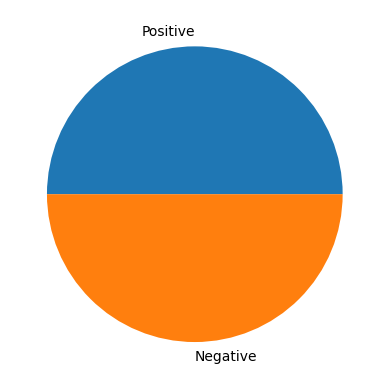

In [69]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [70]:
# Model Building And Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [81]:
# LOgistic Regression
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote ,y_train_smote ) 

y_train_predict = lr.predict(vectorized_x_train_smote)
y_test_predict = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_predict)
validation_scores(y_test,y_test_predict)


Training Scores:
	Accuracy = 0.941
	Precision = 0.917
	Recall = 0.97
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.859
	Precision = 0.682
	Recall = 0.825
	F1-Score = 0.747


In [82]:
## Naive Bayes 
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote ,y_train_smote ) 

y_train_predict = mnb.predict(vectorized_x_train_smote)
y_test_predict = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_predict)
validation_scores(y_test,y_test_predict)



Training Scores:
	Accuracy = 0.908
	Precision = 0.872
	Recall = 0.956
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.866
	Precision = 0.674
	Recall = 0.913
	F1-Score = 0.775


In [83]:
## Decision Tree
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.836
	Precision = 0.666
	Recall = 0.711
	F1-Score = 0.688


In [84]:
## Random Forest 
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)



Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.862
	Precision = 0.753
	Recall = 0.678
	F1-Score = 0.714


In [85]:
#Support Vector Classifier
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)



Training Scores:
	Accuracy = 0.977
	Precision = 0.961
	Recall = 0.995
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.87
	Precision = 0.719
	Recall = 0.798
	F1-Score = 0.757


In [86]:
#Saving the model 
import pickle

with open('../Static/Model/model.pickel','wb') as file:
    pickle.dump(mnb,file)